In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

### Classification : émission du co2

In [2]:
# Load the data
data1 = pd.read_csv('aircraft_emissions_data.csv')

In [3]:
data1['emission_co2'][0]

2093.434017068914

In [4]:
# Group the data by aircraft type and aggregate the CO2 emissions as a list

grouped = data1.groupby('type_avion')['emission_co2'].apply(list)
print(grouped)

max_len = max([len(x) for x in grouped])
# Create a list of arrays of CO2 emissions, with padding to the maximum length
co2_list = [np.pad(np.array(x), (0, max_len - len(x)), 'constant', constant_values=np.mean(x)) for x in grouped]

# Convert the list of arrays to a numpy array
co2_array = np.vstack(co2_list)

# Convert the aggregated CO2 emissions to a numpy array
#co2_array = np.array(grouped.tolist())

# Normalize the data
normalized = (co2_array - co2_array.mean()) / co2_array.std()

# Set the number of clusters
k = 3

# Fit the K-Means clustering model
model = KMeans(n_clusters=k)
model.fit(normalized)

# Get the predicted clusters for each aircraft type
clusters = model.predict(normalized)

# Add the cluster assignments to the original dataframe
data1['cluster'] = data1['type_avion'].apply(lambda x: clusters[grouped.index.get_loc(x)])

# Print the results
print(data1)

type_avion
A319    [4510.62466615232, 2720.2944326979477, 3446.95...
A320    [1726.4337254091413, 4289.154117161629, 2743.2...
A321    [2347.101740012852, 2671.502759960282, 3004.01...
B737                                  [2418.629544872597]
B738    [2093.434017068914, 2062.6060069110285, 3399.3...
E190             [1895.7449932148984, 1799.3669849933417]
Name: emission_co2, dtype: object
    Unnamed: 0 type_avion  emission_co2  cluster
0            0       B738   2093.434017        1
1            4       A319   4510.624666        2
2            5       A320   1726.433725        0
3            7       A321   2347.101740        1
4            8       A321   2671.502760        1
5            9       A321   3004.017174        1
6           10       A319   2720.294433        2
7           14       A321   2920.104774        1
8           21       A320   4289.154117        0
9           22       A320   2743.239449        0
10          23       A320   2047.282542        0
11          24     

c:\Users\chell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


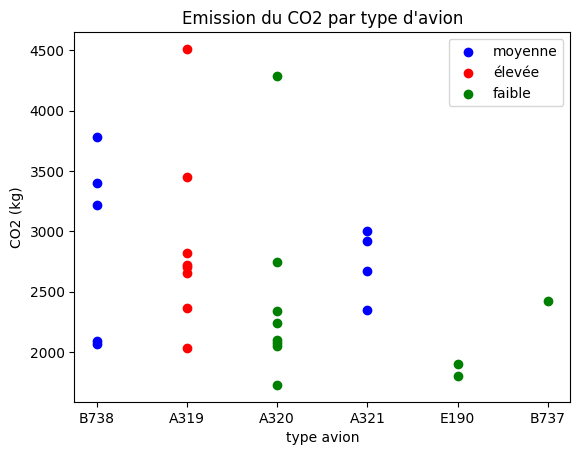

In [9]:
# Define a list of colors for each cluster
colors = ['g','b','r']
label = ["faible", "moyenne","élevée"]
list = []

for i, row in data1.iterrows():
    label_i = label[data1['cluster'][i]]
    if list.__contains__(label_i) : 
        plt.scatter(row['type_avion'], row['emission_co2'], c = colors[data1['cluster'][i]])
    else :
        list.append(label_i)
        plt.scatter(row['type_avion'], row['emission_co2'], c = colors[data1['cluster'][i]], label = label[data1['cluster'][i]])

plt.xlabel('type avion')
plt.ylabel('CO2 (kg)')
plt.title("Emission du CO2 par type d'avion")
plt.legend()
plt.show()